In [ ]:
print("Started")

Started


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip 'drive/MyDrive/Colab-Notebooks/TrafficDetection/tiv.zip' -d 'drive/MyDrive/Colab-Notebooks/TrafficDetection/dataset2'
# !unzip '/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/1920_1080.zip' -d '/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/dataset2/labels/1920_1080s'
!unzip '/content/drive/MyDrive/main_project/mainds.zip' -d '/content/drive/MyDrive/main_project/dataset3'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/airport_inside_0602_jpg.rf.ad6eb2026bb813e214e924e8ec6e7ba9.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AJ1VAAZ9WM4R_jpg.rf.4311b6de7223f0d633fca5819a607577.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AJA8RYF4AF2J_jpg.rf.8785edd765c2290cce34e7a62b921031.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AJM7QW3H20DV_jpg.rf.c37232daa5e0247c01dfed0c0cea448d.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AK4PL75ZQW3O_jpg.rf.59358a538965be0b134b1b14175939f2.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AKBYJRHQCL5J_jpg.rf.37c70b9f92061dc223608562f56935dc.jpg  
  inflating: /content/drive/MyDrive/main_project/dataset3/train/images/AKM0RNWXSV72_jpg.rf.bf210c06f374b8f940d76aea4ce662f3.jpg  
  inflating: /content/drive/MyDr

In [ ]:
# Delete file
# !rm -r "/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/dataset2/labels/val"

!git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 10362, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 10362 (delta 137), reused 254 (delta 135), pack-reused 10078
Receiving objects: 100% (10362/10362), 9.69 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (6935/6935), done.


In [ ]:
!pip install -qr '/content/yolov3/requirements.txt' 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00


In [ ]:
# @title Train from custom weight batch=80 epoch=120 multi class
imgSize = 640 #@param {type:"number"}
batch = 18 #@param {type:"integer"}
epochs = 90 #@param {type:"number"}
output = '/content/drive/MyDrive/main_project/train' #@param{type:"string"}
data = "/content/drive/MyDrive/main_project/dataset3/data.yaml" #@param {type:"string"}
cfg = "''" #@param {type:"string"}
weights = "/content/drive/MyDrive/main_project/train/exp3/weights/best.pt" #@param {type: "string"}


!python '/content/yolov3/train.py' --img $imgSize --project $output --batch $batch --epochs $epochs --data $data --weights $weights --cfg $cfg --cache ram

2023-04-12 08:37:24.224283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 08:37:25.600229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/drive/MyDrive/main_project/train/exp3/weights/best.pt, cfg=, data=/content/drive/MyDrive/main_project/dataset3/data.yaml, hyp=yolov3/data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=18, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/main_project/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_

In [ ]:
# !zip '/content/yolov3/runs/train/exp7'
!cp -r '/content/yolov3/runs/train/exp7' '/content/drive/MyDrive/main_project'

In [ ]:
# @title Detection
imgSize = None #@param {type:"number"}
source = "/content/drive/MyDrive/main_project/pexels-albert-patten-5693112-1920x1080-30fps.mp4" #@param {type:"string"}
weights = "/content/drive/MyDrive/main_project/train/exp3/weights/best.pt" #@param {type: "string"}
output = '/content/drive/MyDrive/main_project/outpyt' #@param{type:"string"}
line_thickness = 2 #@param{type:"number"}
codes = '' #@param{type:"string"}

!python '/content/yolov3/detect.py' --source $source --weights $weights --project $output --line-thickness $line_thickness $codes
#codes:--visualize

detect: weights=['/content/drive/MyDrive/main_project/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/main_project/pexels-albert-patten-5693112-1920x1080-30fps.mp4, data=yolov3/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/main_project/outpyt, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-55-g5d5452d Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
video 1/1 (1/370) /content/drive/MyDrive/main_project/pexels-albert-patten-5693112-1920x1080-30fps.mp4: 384x640 2 Leopards, 48.4ms
video 1/1 (2/370) /content/drive/MyDrive/main_project/pexels-albert-patten-569

In [ ]:
# @title Validation
imgSize = 640 #@param {type:"number"}
source = "/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/dataset2/d1920.yaml" #@param {type:"string"}
weights = "/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/yolov5/runs/train/exp4/weights/best.pt" #@param {type: "string"}
output = '/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/output/' #@param{type:"string"}
batch = 80 #@param {type:"integer"}
codes = '' #@param{type:"string"}
saveHy = True #@param{type:"boolean"}

!python '/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/yolov5/val.py' --data $source --weights $weights --project $output $codes --save-hybrid


python3: can't open file '/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/yolov5/val.py': [Errno 2] No such file or directory


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
res = pd.read_csv('/content/drive/MyDrive/main_project/train/exp3/results.csv')
res

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.031881,0.019006,0.003933,0.90952,0.87326,0.92647,0.57593,0.029431,0.007055,0.000799,0.070180,0.003313,0.003313
1,1,0.034168,0.019209,0.004294,0.84032,0.83179,0.91293,0.55044,0.031377,0.007327,0.001211,0.040070,0.006537,0.006537
2,2,0.035630,0.019624,0.005273,0.80588,0.75272,0.79428,0.42886,0.034490,0.008399,0.002372,0.009850,0.009651,0.009651
3,3,0.037414,0.020359,0.006732,0.80081,0.74783,0.80054,0.46191,0.032799,0.008552,0.006517,0.009505,0.009505,0.009505
4,4,0.038310,0.020926,0.006981,0.74523,0.78610,0.83662,0.45787,0.034892,0.007833,0.008526,0.009505,0.009505,0.009505
5,5,0.036973,0.020652,0.006881,0.75167,0.67871,0.77012,0.43695,0.037723,0.008858,0.020566,0.009340,0.009340,0.009340
6,6,0.037003,0.020877,0.007788,0.70808,0.69875,0.77241,0.39552,0.035865,0.008476,0.006950,0.009175,0.009175,0.009175
7,7,0.037160,0.020405,0.005952,0.84732,0.78542,0.84071,0.50509,0.032819,0.008114,0.004686,0.009010,0.009010,0.009010
8,8,0.037407,0.020717,0.006548,0.83519,0.81730,0.86922,0.52239,0.033410,0.007747,0.001927,0.008845,0.008845,0.008845
9,9,0.036243,0.020362,0.005799,0.82067,0.80578,0.87102,0.51149,0.031959,0.007935,0.003542,0.008680,0.008680,0.008680


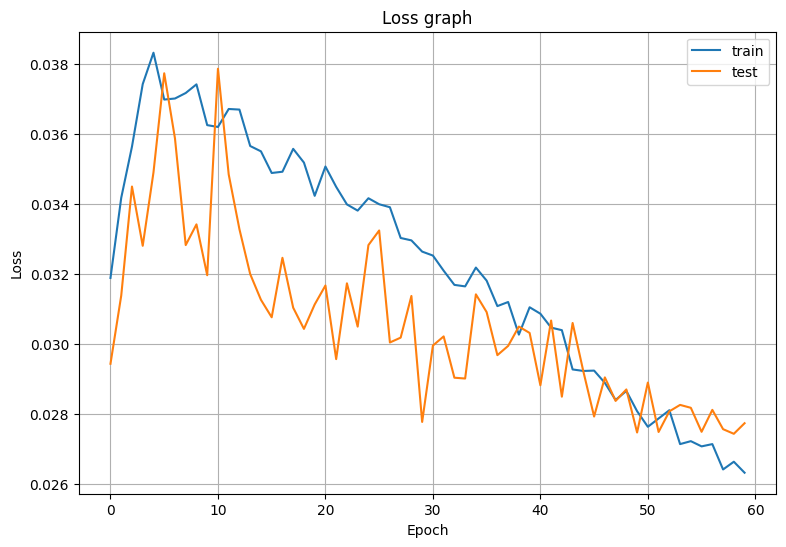

In [ ]:
#loss graph
train = res['      train/box_loss']
val = res['        val/box_loss']
epoch = res['               epoch']

plt.figure(figsize=(9,6))
plt.plot(epoch,train)
plt.plot(epoch, val)
# plt.scatter(epoch,train)
# plt.scatter(epoch,val)
plt.legend(['train','test'])
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/output/Loss.png',format='png')

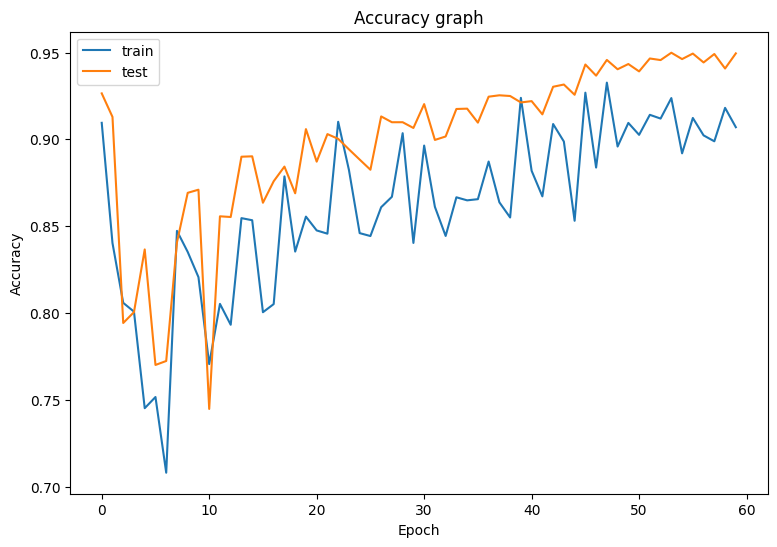

In [ ]:
#training accuracy graph
from ctypes import pointer
# res.keys()
train = res['   metrics/precision']
val = res['     metrics/mAP_0.5']
epoch = res['               epoch']

plt.figure(figsize=(9,6))
plt.plot(epoch,train)
plt.plot(epoch, val)
# plt.scatter(epoch,train)
# plt.scatter(epoch,val)
plt.legend(['train','test'])
plt.title('Accuracy graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
#plt.grid()
#plt.savefig('/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/output/Accuracy.png',format='png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pre_res = pd.read_csv('/content/results.csv')
pre_res

FileNotFoundError: ignored

ValueError: ignored

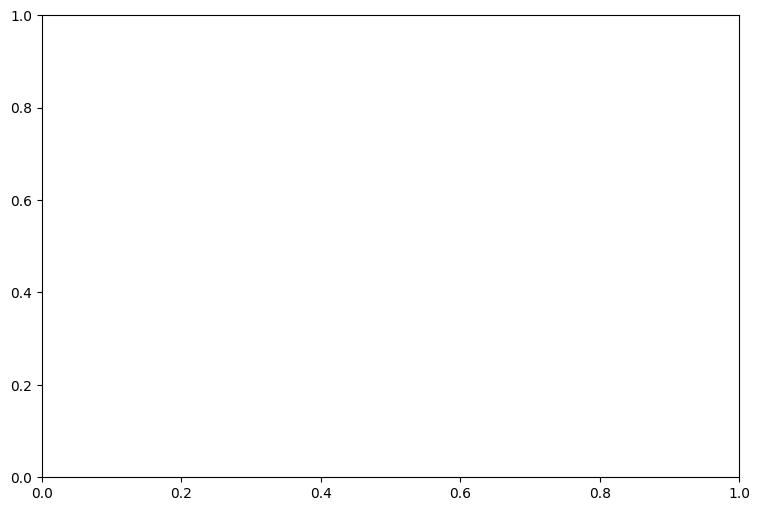

In [ ]:
#comparison
pre = pre_res['     metrics/mAP_0.5']
scr = res['     metrics/mAP_0.5']
epoch = res['               epoch']

plt.figure(figsize=(9,6))
plt.plot(epoch,pre)
plt.plot(epoch, scr)
# plt.scatter(epoch,train)
# plt.scatter(epoch,val)
plt.legend(['pretrained','scratch'])
plt.title('Comparison pretrained vs scratch (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
#plt.savefig('/content/drive/MyDrive/Colab-Notebooks/TrafficDetection/output/Comparison_Accuracy.png',format='png')